![Crime](https://storage.googleapis.com/kaggle-competitions/kaggle/4458/media/sfcrime_banner.png)

# Data fields

Dates - timestamp of the crime incident

* Category - category of the crime incident. This is the target variable you are going to predict.
* Descript - detailed description of the crime incident

* DayOfWeek - the day of the week

* PdDistrict - name of the Police Department District

* Resolution - how the crime incident was resolved 

* Address - the approximate street address of the crime incident 

* X - Longitude

* Y - Latitude

In [1]:
import warnings
warnings.simplefilter("ignore")

import pandas as pd
import numpy as np
from scipy.stats import zscore


import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("train.csv")

In [3]:
df.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541


In [4]:
df.shape

(878049, 9)

In [5]:
df.info()

# There is no null value in Dataset..

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878049 entries, 0 to 878048
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Dates       878049 non-null  object 
 1   Category    878049 non-null  object 
 2   Descript    878049 non-null  object 
 3   DayOfWeek   878049 non-null  object 
 4   PdDistrict  878049 non-null  object 
 5   Resolution  878049 non-null  object 
 6   Address     878049 non-null  object 
 7   X           878049 non-null  float64
 8   Y           878049 non-null  float64
dtypes: float64(2), object(7)
memory usage: 60.3+ MB


In [6]:
df.describe()

,X,Y
count,878049.000000,878049.000000
mean,-122.422616,37.771020
std,0.030354,0.456893
min,-122.513642,37.707879
25%,-122.432952,37.752427
50%,-122.416420,37.775421
75%,-122.406959,37.784369
max,-120.500000,90.000000



<span style="font-family: Westways; font-weight:bold;font-size:3em;color: Red">*EDA(Exploratory Data Analysis)*
         

In [7]:
df.nunique()

Dates         389257
Category          39
Descript         879
DayOfWeek          7
PdDistrict        10
Resolution        17
Address        23228
X              34243
Y              34243
dtype: int64

In [8]:
df["Dates"] 

0         2015-05-13 23:53:00
1         2015-05-13 23:53:00
2         2015-05-13 23:33:00
3         2015-05-13 23:30:00
4         2015-05-13 23:30:00
                 ...         
878044    2003-01-06 00:15:00
878045    2003-01-06 00:01:00
878046    2003-01-06 00:01:00
878047    2003-01-06 00:01:00
878048    2003-01-06 00:01:00
Name: Dates, Length: 878049, dtype: object

In [9]:
df["Dates"].dtypes

dtype('O')

**Extract other variables from date**

* Year, Month, Quarter, Day_of_Month, Day_of_week, Hour..

In [10]:
df.loc[:,'Year']=pd.to_datetime(df.loc[:,'Dates'] ).dt.year

In [11]:
df.loc[:,'Quarter']=pd.to_datetime(df.loc[:,'Dates'] ).dt.quarter

In [12]:
df.loc[:,'Month']=pd.to_datetime(df.loc[:,'Dates'] ).dt.month

In [13]:
df.loc[:,'Day_of_month']=pd.to_datetime(df.loc[:,'Dates'] ).dt.day

In [14]:
df.loc[:,'Day_of_week']=pd.to_datetime(df.loc[:,'Dates'] ).dt.weekday

#  Week day start from monday means 0.

In [15]:
df.loc[:,'Hours']=pd.to_datetime(df.loc[:,'Dates'] ).dt.hour

In [16]:
df.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,Year,Quarter,Month,Day_of_month,Day_of_week,Hours
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,2015,2,5,13,2,23
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,2015,2,5,13,2,23
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414,2015,2,5,13,2,23
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873,2015,2,5,13,2,23
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541,2015,2,5,13,2,23


## Univariate Analysis

In [17]:
df["Dates"].value_counts().head(10)

# On 2011-01-01 crime rate is high..meaning criminal active on New year eve..

2011-01-01 00:01:00    185
2006-01-01 00:01:00    136
2012-01-01 00:01:00     94
2006-01-01 12:00:00     63
2007-06-01 00:01:00     61
2006-06-01 00:01:00     58
2010-06-01 00:01:00     56
2010-08-01 00:01:00     55
2008-04-01 00:01:00     53
2013-11-01 00:01:00     52
Name: Dates, dtype: int64

In [18]:
df["Category"].value_counts().head(10)

#  LARCENY/THEFT have high rate and this crime belong from proporty crime..

LARCENY/THEFT     174900
OTHER OFFENSES    126182
NON-CRIMINAL       92304
ASSAULT            76876
DRUG/NARCOTIC      53971
VEHICLE THEFT      53781
VANDALISM          44725
WARRANTS           42214
BURGLARY           36755
SUSPICIOUS OCC     31414
Name: Category, dtype: int64

In [19]:
df["Descript"].value_counts().head(10)

# 60022 case happen of "GRAND THEFT FROM LOCKED AUTO" crime..

GRAND THEFT FROM LOCKED AUTO                 60022
LOST PROPERTY                                31729
BATTERY                                      27441
STOLEN AUTOMOBILE                            26897
DRIVERS LICENSE, SUSPENDED OR REVOKED        26839
WARRANT ARREST                               23754
SUSPICIOUS OCCURRENCE                        21891
AIDED CASE, MENTAL DISTURBED                 21497
PETTY THEFT FROM LOCKED AUTO                 19771
MALICIOUS MISCHIEF, VANDALISM OF VEHICLES    17789
Name: Descript, dtype: int64

In [20]:
df["DayOfWeek"].value_counts()

#  On Friday crime rate (133734) is high..means on week end

Friday       133734
Wednesday    129211
Saturday     126810
Thursday     125038
Tuesday      124965
Monday       121584
Sunday       116707
Name: DayOfWeek, dtype: int64

In [21]:
df["PdDistrict"].value_counts()

# In south 157182 crime case is happen..

SOUTHERN      157182
MISSION       119908
NORTHERN      105296
BAYVIEW        89431
CENTRAL        85460
TENDERLOIN     81809
INGLESIDE      78845
TARAVAL        65596
PARK           49313
RICHMOND       45209
Name: PdDistrict, dtype: int64

In [22]:
df["Resolution"].value_counts().head(10)

#  526790 case are not resolve, 206403 case of ARREST & BOOKED is resloved..

NONE                                      526790
ARREST, BOOKED                            206403
ARREST, CITED                              77004
LOCATED                                    17101
PSYCHOPATHIC CASE                          14534
UNFOUNDED                                   9585
JUVENILE BOOKED                             5564
COMPLAINANT REFUSES TO PROSECUTE            3976
DISTRICT ATTORNEY REFUSES TO PROSECUTE      3934
NOT PROSECUTED                              3714
Name: Resolution, dtype: int64

In [23]:
df["Resolution"].nunique()

17

In [24]:
df["Address"].value_counts().head(10)

# On "800 Block of BRYANT ST" address crime was occur 26533 times

800 Block of BRYANT ST      26533
800 Block of MARKET ST       6581
2000 Block of MISSION ST     5097
1000 Block of POTRERO AV     4063
900 Block of MARKET ST       3251
0 Block of TURK ST           3228
0 Block of 6TH ST            2884
300 Block of ELLIS ST        2703
400 Block of ELLIS ST        2590
16TH ST / MISSION ST         2504
Name: Address, dtype: int64

In [25]:
print("Longitude","\n",df['X'].value_counts().head(),"\n")
print("Latitude","\n",df['Y'].value_counts().head())

# On longitude -122.403405 and Latitude 37.775421 crime occur 26354 times..

Longitude 
 -122.403405    26354
-122.419658     4449
-122.406539     3891
-122.407634     3170
-122.419672     3006
Name: X, dtype: int64 

Latitude 
 37.775421    26354
37.764221     4449
37.756486     3891
37.784189     3170
37.765050     3006
Name: Y, dtype: int64


In [26]:
df['Y'].value_counts().head()

37.775421    26354
37.764221     4449
37.756486     3891
37.784189     3170
37.765050     3006
Name: Y, dtype: int64

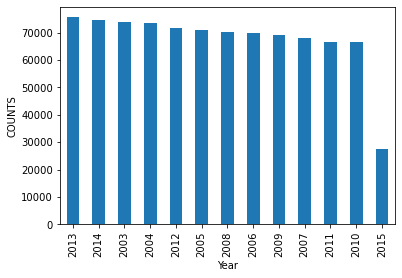

Counts of Year


2013    75606
2014    74766
2003    73902
2004    73422
2012    71731
2005    70779
2008    70174
2006    69909
2009    69000
2007    68015
2011    66619
2010    66542
2015    27584
Name: Year, dtype: int64

In [27]:
df['Year'].value_counts().plot(kind = 'bar')
plt.xlabel("Year")
plt.ylabel("COUNTS")
plt.show()

print("Counts of Year")
df['Year'].value_counts() 

# In 2013 year the crime rate is high..


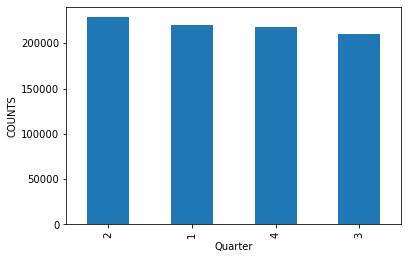

Counts of Quarters


2    228632
1    220669
4    218255
3    210493
Name: Quarter, dtype: int64

In [28]:
df['Quarter'].value_counts().plot(kind = 'bar')
plt.xlabel("Quarter")
plt.ylabel("COUNTS")
plt.show()

print("Counts of Quarters")
df['Quarter'].value_counts()

#  In the 2nd quarter crime is high..

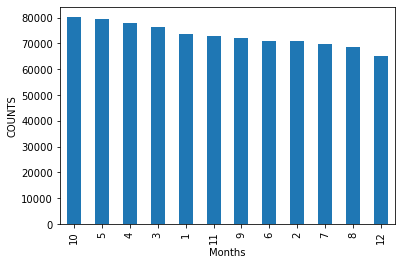

Counts of Months


10    80274
5     79644
4     78096
3     76320
1     73536
11    72975
9     71982
6     70892
2     70813
7     69971
8     68540
12    65006
Name: Month, dtype: int64

In [29]:
df['Month'].value_counts().plot(kind = 'bar')
plt.xlabel("Months")
plt.ylabel("COUNTS")
plt.show()

print("Counts of Months")
df['Month'].value_counts() 



#  In 10th month of year crime rate is high..

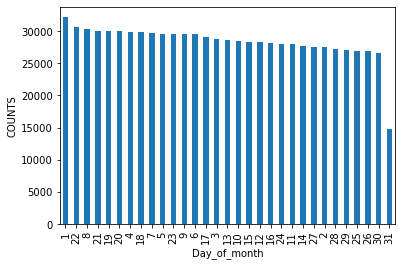

Counts of Day_of_month


1     32167
22    30589
8     30339
21    30038
19    30012
20    29963
4     29905
18    29793
7     29685
5     29557
23    29547
9     29502
6     29482
17    29031
3     28691
13    28580
10    28395
15    28224
12    28223
16    28146
24    27987
11    27952
14    27670
27    27577
2     27471
28    27269
29    27108
25    26932
26    26870
30    26589
31    14755
Name: Day_of_month, dtype: int64

In [30]:
df['Day_of_month'].value_counts().plot(kind = 'bar')
plt.xlabel("Day_of_month")
plt.ylabel("COUNTS")
plt.show()

print("Counts of Day_of_month")
df['Day_of_month'].value_counts() 
 

# On the first day of month the crime rate is highest but on last day crime is half..  

In [31]:
df['Hours'].value_counts()

#  In between 15:00 to 19:00 the crime cases occur..but mostly in 17:00 to 18:00..

18    55104
17    53553
12    51934
16    50137
19    49475
15    48058
22    45741
0     44865
20    44694
14    44424
21    43661
13    43145
23    42460
11    38373
10    37806
9     35555
8     32900
1     26173
2     22296
7     22048
3     14014
6     13133
4      9863
5      8637
Name: Hours, dtype: int64


<span style="font-family: Westways; font-weight:bold;font-size:3em;color: Red">*SUMMARY*
       

* **Date** - **2011-01-01 00:01:00** (185) crime rate is high..meaning criminal active on New year eve..


* **Category** **LARCENY/THEFT** is occur 174900 time  and this crime belong from proporty crime..


* **Descript** - 60022 case happen of **GRAND THEFT FROM LOCKED AUTO** crime..


* **DayOfWeek** - On **Friday** crime rate (133734) is high..means on week end.


* **PdDistrict** - In **south** 157182 crime case is happen..



* **Resolution** - 526790 case are **None** resolve, 206403 case of **ARREST & BOOKED** is resloved..


* **Address** On **800 Block of BRYANT ST** address crime was occur 26533 times.


* **Longitude(X) and Latitude(Y)**  On longitude **-122.403405 and Latitude 37.775421** crime occur 26354 times..


* **Year** In **2013** year the crime extreamly is high..the case are 75606. This is **13 years** data from 2003 to 2015.


* **Quarter** In the **2nd quarter** crime is high..and case are 228632 but in other quarter numbers are same.


* **Month** In **10th month** of year 80274 crime cases happen.


* **Day_of_month** On the **first day** of month the crime rate is highest but on last day crime is half..  the numbers are 32167 on 1 day of month & 14755 cases on (31)last day of the month.

 

* **Hours** In between **15:00 to 19:00** the crime cases occur..but mostly in **17:00 to 18:00**..

## Bivariate Analysis

In [32]:
 df.head(2)

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,Year,Quarter,Month,Day_of_month,Day_of_week,Hours
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,2015,2,5,13,2,23
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,2015,2,5,13,2,23


### Interpretation of Date - **2011-01-01 00:01:00** (185) in which crime rate is high.

In [33]:
df[df["Dates"]=="2011-01-01 00:01:00"].head(10)

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,Year,Quarter,Month,Day_of_month,Day_of_week,Hours
316121,2011-01-01 00:01:00,LARCENY/THEFT,EMBEZZLEMENT FROM DEPENDENT OR ELDER ADULT BY ...,Saturday,NORTHERN,EXCEPTIONAL CLEARANCE,1800 Block of SUTTER ST,-122.430792,37.786456,2011,1,1,1,5,0
316122,2011-01-01 00:01:00,FRAUD,"FORGERY, CREDIT CARD",Saturday,SOUTHERN,NONE,400 Block of JESSIE ST,-122.408534,37.782033,2011,1,1,1,5,0
316123,2011-01-01 00:01:00,OTHER OFFENSES,FALSE PERSONATION TO RECEIVE MONEY OR PROPERTY,Saturday,BAYVIEW,NONE,0 Block of DAKOTA ST,-122.395635,37.753565,2011,1,1,1,5,0
316124,2011-01-01 00:01:00,NON-CRIMINAL,CASE CLOSURE,Saturday,BAYVIEW,PROSECUTED BY OUTSIDE AGENCY,0 Block of GARLINGTON CT,-122.384358,37.732500,2011,1,1,1,5,0
316125,2011-01-01 00:01:00,OTHER OFFENSES,FALSE PERSONATION TO RECEIVE MONEY OR PROPERTY,Saturday,TARAVAL,NONE,1300 Block of 24TH AV,-122.482347,37.762380,2011,1,1,1,5,0
316126,2011-01-01 00:01:00,OTHER OFFENSES,FALSE PERSONATION TO RECEIVE MONEY OR PROPERTY,Saturday,BAYVIEW,NONE,1200 Block of REVERE AV,-122.383599,37.728010,2011,1,1,1,5,0
316127,2011-01-01 00:01:00,OTHER OFFENSES,"DRIVERS LICENSE, SUSPENDED OR REVOKED",Saturday,BAYVIEW,"ARREST, CITED",2700 Block of SAN BRUNO AV,-122.403277,37.727039,2011,1,1,1,5,0
316128,2011-01-01 00:01:00,OTHER OFFENSES,FALSE PERSONATION TO RECEIVE MONEY OR PROPERTY,Saturday,INGLESIDE,NONE,200 Block of PORTOLA DR,-122.444276,37.748497,2011,1,1,1,5,0
316129,2011-01-01 00:01:00,VANDALISM,"MALICIOUS MISCHIEF, VANDALISM OF VEHICLES",Saturday,INGLESIDE,NONE,200 Block of STAPLES AV,-122.447728,37.729023,2011,1,1,1,5,0
316130,2011-01-01 00:01:00,NON-CRIMINAL,COURTESY REPORT,Saturday,SOUTHERN,NONE,800 Block of BRYANT ST,-122.403405,37.775421,2011,1,1,1,5,0


In [34]:
pd.DataFrame(df.loc[df["Dates"]=="2011-01-01 00:01:00", ["Category","Descript","DayOfWeek", "PdDistrict", "Resolution"]].head(10).value_counts())

0
Category       Descript                                           DayOfWeek PdDistrict Resolution                     
OTHER OFFENSES FALSE PERSONATION TO RECEIVE MONEY OR PROPERTY     Saturday  BAYVIEW    NONE                          2
FRAUD          FORGERY, CREDIT CARD                               Saturday  SOUTHERN   NONE                          1
LARCENY/THEFT  EMBEZZLEMENT FROM DEPENDENT OR ELDER ADULT BY C... Saturday  NORTHERN   EXCEPTIONAL CLEARANCE         1
NON-CRIMINAL   CASE CLOSURE                                       Saturday  BAYVIEW    PROSECUTED BY OUTSIDE AGENCY  1
               COURTESY REPORT                                    Saturday  SOUTHERN   NONE                          1
OTHER OFFENSES DRIVERS LICENSE, SUSPENDED OR REVOKED              Saturday  BAYVIEW    ARREST, CITED                 1
               FALSE PERSONATION TO RECEIVE MONEY OR PROPERTY     Saturday  INGLESIDE  NONE                          1
                                                                            TARAVAL    NONE                          1
VANDALISM      MALICIOUS MISCHIEF, VANDALISM OF VEHICLES          Saturday  INGLESIDE  NONE                          1

In [35]:
df.loc[df["Dates"]=="2011-01-01 00:01:00",[ "Address", "X", "Y"]].value_counts()

Address                              X            Y        
800 Block of BRYANT ST               -122.403405  37.775421    9
500 Block of FLOOD AV                -122.451807  37.729814    4
0 Block of TURK ST                   -122.409854  37.783386    4
0 Block of MOSS ST                   -122.408112  37.777759    4
600 Block of 25TH AV                 -122.484596  37.777213    3
                                                              ..
1300 Block of HAYES ST               -122.438637  37.774829    1
1300 Block of BUSH ST                -122.419508  37.788857    1
1300 Block of 24TH AV                -122.482347  37.762380    1
1300 Block of 19TH AV                -122.477230  37.762603    1
MARKET ST / THE EMBARCADEROSOUTH ST  -122.393984  37.795061    1
Length: 130, dtype: int64

In [36]:
df.loc[df["Dates"]=="2011-01-01 00:01:00",["Year","Quarter","Month","Day_of_month","Day_of_week", "Hours"]].value_counts()

Year  Quarter  Month  Day_of_month  Day_of_week  Hours
2011  1        1      1             5            0        185
dtype: int64

## Key Points

* crime Date is **2011-01-01 00:01:00** (185).


* Crime **Category** is  **OTHER OFFENSES** (75).


* Crime **Descript** is **FALSE PERSONATION TO RECEIVE MONEY OR PROPERTY** (4).


* Crime **DayOfWeek** is **Saturday** (185).


* Crime **PdDistrict** is **BAYVIEW** (4). 


* Crime **Resolution** is **None** (7).


* Crime **Address** is **800 Block of BRYANT ST** (9).


* Crime **Longitude(X) and Latitude(Y)** is **-122.403405  37.775421** (9).


* Because the Date is **2011-01-01 00:01:00**.


 The crime **Year** is **2011**, **Quarter** is **1st**, **Month** is also **1**, **Day_of_month** is **1**, **Hours** is **1** o'clock (185).


### Interpretation of **Address** - **800 Block of BRYANT ST** (26533), In which crime rate is high.

In [37]:
pd.DataFrame(df.loc[df[ "Address"]=="800 Block of BRYANT ST"]).head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,Year,Quarter,Month,Day_of_month,Day_of_week,Hours
147,2015-05-13 16:20:00,LARCENY/THEFT,PETTY THEFT FROM A BUILDING,Wednesday,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,2015,2,5,13,2,16
190,2015-05-13 14:30:00,WARRANTS,WARRANT ARREST,Wednesday,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,2015,2,5,13,2,14
225,2015-05-13 13:05:00,LARCENY/THEFT,GRAND THEFT FROM UNLOCKED AUTO,Wednesday,SOUTHERN,NONE,800 Block of BRYANT ST,-122.403405,37.775421,2015,2,5,13,2,13
380,2015-05-12 22:00:00,OTHER OFFENSES,"DRIVERS LICENSE, SUSPENDED OR REVOKED",Tuesday,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,2015,2,5,12,1,22
446,2015-05-12 19:00:00,LARCENY/THEFT,GRAND THEFT FROM UNLOCKED AUTO,Tuesday,SOUTHERN,NONE,800 Block of BRYANT ST,-122.403405,37.775421,2015,2,5,12,1,19


In [38]:
df.loc[(df[ "Address"]=="800 Block of BRYANT ST"),["Dates","Category", "Descript","Resolution" ]].value_counts().head(10)

Dates                Category      Descript                      Resolution
2008-04-01 00:01:00  NON-CRIMINAL  LOST PROPERTY                 NONE          5
2009-05-01 00:01:00  NON-CRIMINAL  LOST PROPERTY                 NONE          4
2007-11-01 09:00:00  NON-CRIMINAL  LOST PROPERTY                 NONE          4
2009-06-09 00:01:00  FRAUD         CREDIT CARD, THEFT BY USE OF  NONE          4
2007-07-01 00:01:00  NON-CRIMINAL  LOST PROPERTY                 NONE          4
2005-12-01 00:01:00  NON-CRIMINAL  LOST PROPERTY                 NONE          4
2008-11-01 00:01:00  NON-CRIMINAL  LOST PROPERTY                 NONE          4
2006-01-01 12:00:00  NON-CRIMINAL  LOST PROPERTY                 NONE          4
2012-04-17 09:20:00  NON-CRIMINAL  PROPERTY FOR IDENTIFICATION   NONE          3
2004-06-27 15:00:00  NON-CRIMINAL  LOST PROPERTY                 NONE          3
dtype: int64

## Key Points

* crime Date is **2012-01-01 00:01:00 & 2005-12-01 00:01:00** (13).


* Crime **Category** is  **LARCENY/THEFT** (6144).


* Crime **Descript** is **LOST PROPERTY** (3630) which belong from **Non-Criminal** category.


* Crime **DayOfWeek** is **Wednesday** (185).


* Crime **PdDistrict** is **SOUTHERN** (4). 


* Crime **Resolution** is **None** (18917).



* Crime **Longitude(X) and Latitude(Y)** is **-122.403405  37.775421** (9).


* Because the Latest Date is **2012-01-01 00:01:00**.


 The crime **Year** is **2012**, **Quarter** is **1st**, **Month** is also **1**, **Day_of_month** is **1**, **Hours** is **1** o'clock (185).

In [39]:
df.loc[df[ "Resolution"]=="NONE",["PdDistrict"]].value_counts()

# In SOUTHERN PdDistrict the case resolution is NONE may be because the crime rate is high.

PdDistrict
SOUTHERN      93924
NORTHERN      70251
MISSION       63056
CENTRAL       60388
BAYVIEW       51785
INGLESIDE     51047
TARAVAL       45018
RICHMOND      32729
PARK          30895
TENDERLOIN    27697
dtype: int64

In [40]:
df[df["Category"] == "LARCENY/THEFT"]["Year"].value_counts()

# In 2013 & 2014 the crime Category belong from the  "LARCENY/THEFT" .

2014    18901
2013    18152
2012    15639
2006    13798
2011    13084
2003    12990
2008    12800
2007    12760
2009    12538
2005    12402
2010    12214
2004    12111
2015     7511
Name: Year, dtype: int64

#### Duplicate Data

In [41]:
Duplicate = df[df.duplicated()]

In [42]:
Duplicate["Dates"].value_counts()

2013-10-18 15:00:00    15
2004-07-07 10:00:00    12
2010-04-10 22:15:00    12
2012-07-15 06:00:00    10
2011-08-12 08:00:00     9
                       ..
2004-02-17 10:51:00     1
2005-02-13 15:00:00     1
2014-11-15 12:14:00     1
2005-04-24 22:25:00     1
2010-09-11 16:30:00     1
Name: Dates, Length: 1852, dtype: int64

In [43]:
Duplicate.shape

# There are 2323 records are duplicate and in which on  Date "2013-10-18 15:00:00" 15 times crime occur we assume it happen.
# because may be the house is abandon, otherwise we can drop it....

(2323, 15)

###  Treatment for Target variable

In [44]:
df.head(2)

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,Year,Quarter,Month,Day_of_month,Day_of_week,Hours
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,2015,2,5,13,2,23
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,2015,2,5,13,2,23


In [45]:
df['Category'].unique()

array(['WARRANTS', 'OTHER OFFENSES', 'LARCENY/THEFT', 'VEHICLE THEFT',
       'VANDALISM', 'NON-CRIMINAL', 'ROBBERY', 'ASSAULT', 'WEAPON LAWS',
       'BURGLARY', 'SUSPICIOUS OCC', 'DRUNKENNESS',
       'FORGERY/COUNTERFEITING', 'DRUG/NARCOTIC', 'STOLEN PROPERTY',
       'SECONDARY CODES', 'TRESPASS', 'MISSING PERSON', 'FRAUD',
       'KIDNAPPING', 'RUNAWAY', 'DRIVING UNDER THE INFLUENCE',
       'SEX OFFENSES FORCIBLE', 'PROSTITUTION', 'DISORDERLY CONDUCT',
       'ARSON', 'FAMILY OFFENSES', 'LIQUOR LAWS', 'BRIBERY',
       'EMBEZZLEMENT', 'SUICIDE', 'LOITERING',
       'SEX OFFENSES NON FORCIBLE', 'EXTORTION', 'GAMBLING', 'BAD CHECKS',
       'TREA', 'RECOVERED VEHICLE', 'PORNOGRAPHY/OBSCENE MAT'],
      dtype=object)

--> Divided category into different umbrella crime.

In [46]:
Cyber_crimes = ['SECONDARY CODES', 'FRAUD', 'EMBEZZLEMENT', 'BAD CHECKS', 'FORGERY/COUNTERFEITING', 'SUSPICIOUS OCC']

In [47]:
Organized_crimes = [ 'EXTORTION', 'KIDNAPPING', 'ROBBERY', 'BRIBERY', 'MISSING PERSON', 'TRESPASS']

In [48]:
Consensual_crimes = ['DRUNKENNESS', 'LIQUOR LAWS',  'DRIVING UNDER THE INFLUENCE', 'DISORDERLY CONDUCT'
                    , 'GAMBLING', 'DRUG/NARCOTIC', 'SUICIDE' ]

In [49]:
Intimate_crimes = ['SEX OFFENSES NON FORCIBLE', 'PORNOGRAPHY/OBSCENE MAT', 'SEX OFFENSES FORCIBLE', 'PROSTITUTION', 
             'ASSAULT' ]

In [50]:
Property_crimes = ['LARCENY/THEFT','BURGLARY', 'VEHICLE THEFT', 'ARSON', 'RECOVERED VEHICLE', 'STOLEN PROPERTY'
                  , 'VANDALISM']

In [51]:
others = ['WARRANTS', 'OTHER OFFENSES', 'NON-CRIMINAL', 'WEAPON LAWS', 'RUNAWAY', 'FAMILY OFFENSES',
          'LOITERING','TREA']

In [52]:
print(len(Cyber_crimes), len(Organized_crimes)) 
print(len(Consensual_crimes), len(Intimate_crimes)) 
print(len(Property_crimes), len(others)) 

6 6
7 5
7 8


### Divide DataFrame into umbrella crime because feature extraction is computationally hard

In [53]:
Cyber=df.loc[(df["Category"]=='SECONDARY CODES')|(df["Category"]=='FRAUD')|(df["Category"]=='EMBEZZLEMENT')|(df["Category"]=='BAD CHECKS')|(df["Category"]=='FORGERY/COUNTERFEITING')|(df["Category"]=='SUSPICIOUS OCC')].reset_index(drop = True)

In [54]:
Organised = df.loc[(df["Category"]=='EXTORTION')|(df["Category"]=='KIDNAPPING')|(df["Category"]== 'ROBBERY')|(df["Category"]=='BRIBERY')|(df["Category"]=='MISSING PERSON')|(df["Category"]=='TRESPASS')].reset_index(drop = True)

In [55]:
Consensual = df.loc[(df["Category"]=='DRUNKENNESS')|(df["Category"]=='LIQUOR LAWS')|(df["Category"]=='DRIVING UNDER THE INFLUENCE')|(df["Category"]=='DISORDERLY CONDUCT')|(df["Category"]==
        'GAMBLING')|(df["Category"]== 'DRUG/NARCOTIC')|(df["Category"]=='SUICIDE')].reset_index(drop = True)

In [56]:
Intimate = df.loc[(df["Category"]=='SEX OFFENSES NON FORCIBLE')|(df["Category"]=='PORNOGRAPHY/OBSCENE MAT')|(df["Category"]=='SEX OFFENSES FORCIBLE')|(df["Category"]== 'PROSTITUTION')|(df["Category"]=='ASSAULT') ].reset_index(drop = True)

In [57]:
Property = df.loc[(df["Category"]=='LARCENY/THEFT')|(df["Category"]=='BURGLARY')|(df["Category"]=='VEHICLE THEFT')|(df["Category"]=='ARSON')|(df["Category"]=='RECOVERED VEHICLE')|(df["Category"]=='STOLEN PROPERTY')|(df["Category"]=='VANDALISM')].reset_index(drop = True)

In [58]:
Others = df.loc[(df["Category"]=='WARRANTS')|(df["Category"]=='OTHER OFFENSES')|(df["Category"]=='NON-CRIMINAL')|(df["Category"]=='WEAPON LAWS')|(df["Category"]=='RUNAWAY')|(df["Category"]=='FAMILY OFFENSES')|(df["Category"]=='LOITERING')|(df["Category"]=='TREA')].reset_index(drop = True)

In [59]:
print(Cyber.shape, Organised.shape) 
print(Consensual.shape, Intimate.shape)
print(Property.shape, Others.shape) 

(70259, 15) (59201, 15)
(67396, 15) (88918, 15)
(319352, 15) (272923, 15)


In [60]:
data_list = ["Cyber", "Organised", "Consensual", "Intimate", "Property", "Others"]

## Extract state column from Address.

In [61]:
c = []
for i in range(len(Cyber)):
    
    c.append(Cyber.loc[i,"Address"][-2:])

Cyber["State"] = c

In [62]:
o =[]
for i in range(len(Organised)):
    
     o.append(Organised.loc[i,"Address"][-2:])

Organised["State"] = o

In [63]:
C = []
for i in range(len(Consensual)):
    C.append(Consensual.loc[i,"Address"][-2:])

Consensual["State"] = C

In [64]:
I = []
for i in range(len(Intimate)):
    I.append(Intimate.loc[i,"Address"][-2:])
    
Intimate["State"] = I

In [65]:
p=[]

for i in range(len(Property)):
    p.append(Property.loc[i,"Address"][-2:])
    
Property["State"] = p

In [66]:
O = []
for i in range(len(Others)):
    O.append(Others.loc[i,"Address"][-2:])

Others["State"] = O

In [67]:
# Cyber.head()

In [68]:
print(Cyber["State"].nunique())
print(Organised["State"].nunique())
print(Consensual["State"].nunique())
print(Intimate["State"].nunique())
print(Property["State"].nunique())
print(Others["State"].nunique())

22
18
18
21
26
23


In [69]:
 print(Cyber["State"].unique())
print(Organised["State"].unique())
print(Consensual["State"].unique())
print(Intimate["State"].unique())
print(Property["State"].unique())
print(Others["State"].unique())

['ST' 'AV' 'TR' 'LN' 'DR' 'CT' 'RD' 'WY' 'HY' 'BL' 'PL' 'AL' 'CR' 'PZ'
 'ER' 'AY' 'MS' 'EX' 'NO' '80' 'AR' ' /']
['ST' 'AV' 'TR' 'LN' 'BL' 'DR' 'WY' 'RD' 'CT' 'AY' 'HY' 'PL' 'PZ' 'AL'
 'CR' 'ER' '80' 'AR']
['ST' 'CT' 'AV' 'BL' 'DR' 'PZ' 'WY' 'CR' 'PL' 'RD' 'TR' 'HY' 'LN' 'AL'
 'AY' 'ER' '80' 'RK']
['ST' 'CT' 'AV' 'PZ' 'LN' 'TR' 'BL' 'DR' 'WY' 'AY' 'PL' 'HY' 'RD' 'CR'
 'AL' 'MS' 'ER' '80' 'RK' 'TI' 'AR']
['ST' 'AV' 'BL' 'WY' 'DR' 'CT' 'HY' 'RD' 'PL' 'TR' 'AY' 'LN' 'PZ' 'MS'
 'ER' 'AL' 'CR' 'TI' 'WK' 'EX' 'RW' 'NO' 'AR' '80' 'RK' ' /']
['ST' 'WY' 'AV' 'CT' 'PZ' 'BL' 'TR' 'DR' 'PL' 'AY' 'HY' 'AL' 'RD' 'LN'
 'CR' 'ER' 'MS' 'EX' 'NO' 'AR' '80' 'RK' ' /']


In [70]:
Cyber.head(2)

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,Year,Quarter,Month,Day_of_month,Day_of_week,Hours,State
0,2015-05-13 19:30:00,SUSPICIOUS OCC,INVESTIGATIVE DETENTION,Wednesday,SOUTHERN,NONE,OTIS ST / GOUGH ST,-122.420347,37.771769,2015,2,5,13,2,19,ST
1,2015-05-13 19:26:00,SUSPICIOUS OCC,INVESTIGATIVE DETENTION,Wednesday,CENTRAL,NONE,900 Block of BUSH ST,-122.412929,37.789687,2015,2,5,13,2,19,ST


In [71]:
 print(Cyber["State"].unique())

['ST' 'AV' 'TR' 'LN' 'DR' 'CT' 'RD' 'WY' 'HY' 'BL' 'PL' 'AL' 'CR' 'PZ'
 'ER' 'AY' 'MS' 'EX' 'NO' '80' 'AR' ' /']


In [72]:
#  To Cheak the address contains 80 and " /".

In [73]:
for i in range(len(df["Address"])):
    if df.loc[i,"Address"][-2:] == " /":
        print(df.loc[i,"Address"])

TEHAMA ST /
TEHAMA ST /
GENEVA AV /
CLEMENTINA ST /


In [74]:
for i in range(len(Cyber["Address"])):
    if Cyber.loc[i,"Address"][-2:] == " /":
        print(Cyber.loc[i,"Address"])

GENEVA AV /


In [75]:
for i in range(len(Property["Address"])):
    if Property.loc[i,"Address"][-2:] == " /":
        print(Property.loc[i,"Address"])

CLEMENTINA ST /


In [76]:
for i in range(len(Others["Address"])):
    if Others.loc[i,"Address"][-2:] == " /":
        print(Others.loc[i,"Address"])

TEHAMA ST /
TEHAMA ST /


In [77]:
Cyber["State"].replace([" /", "AV"], inplace = True)

Property["State"].replace([" /", "ST"], inplace = True)

Others["State"].replace([" /", "ST"], inplace = True)

In [78]:
for i in range(len(df["Address"])):
    if df.loc[i,"Address"][-2:] == "80":
        print(df.loc[i,"Address"]) 
    

200 Block of I-80
200 Block of I-80
200 Block of I-80
200 Block of I-80
200 Block of I-80
200 Block of I-80
200 Block of I-80
200 Block of I-80
200 Block of I-80
200 Block of I-80
200 Block of I-80
200 Block of I-80
200 Block of I-80
500 Block of I-80
200 Block of I-80
200 Block of I-80
200 Block of I-80
200 Block of I-80
200 Block of I-80
200 Block of I-80
200 Block of I-80
200 Block of I-80
200 Block of I-80
200 Block of I-80
200 Block of I-80
200 Block of I-80
200 Block of I-80
200 Block of I-80
200 Block of I-80
200 Block of I-80
200 Block of I-80
200 Block of I-80
200 Block of I-80
200 Block of I-80
200 Block of I-80
200 Block of I-80
200 Block of I-80
200 Block of I-80
200 Block of I-80
200 Block of I-80
200 Block of I-80
200 Block of I-80
200 Block of I-80
200 Block of I-80
MARIPOSA ST / I-280
200 Block of I-80
200 Block of I-80
200 Block of I-80
200 Block of I-80
200 Block of I-80
200 Block of I-80
200 Block of I-80
200 Block of I-80
200 Block of I-80
200 Block of I-80
200 Bloc

###  (interstate) I-80 is a 2,900-mile-long east-west highway.

In [79]:
#  Set of State from various sub dataframes

cy_state = set(Cyber["State"].unique())
or_state = set(Organised["State"].unique())

co_state = set(Consensual["State"].unique())
in_state = set(Intimate["State"].unique())

po_state = set(Property["State"].unique())
ot_state = set(Others["State"].unique())

In [80]:
cy_or = cy_state.union(or_state)

co_in = co_state.union(in_state)

po_ot = po_state.union(ot_state)

In [81]:
cy_or_co_in = cy_or.union(co_in)

Total_states =  list(cy_or_co_in.union(po_ot))

In [82]:
print(cy_state, or_state)

{'CR', 'MS', 'PL', 'ST', 'TR', 'EX', '80', 'LN', 'WY', 'RD', 'PZ', 'HY', 'ER', 'DR', 'AR', 'AY', 'AL', 'NO', 'BL', 'CT'} {'ST', 'DR', '80', 'AR', 'CR', 'LN', 'AY', 'WY', 'RD', 'AL', 'ER', 'AV', 'PZ', 'HY', 'BL', 'PL', 'CT', 'TR'}


In [83]:
Total_states.sort()

In [84]:
print(Total_states)

['80', 'AL', 'AR', 'AV', 'AY', 'BL', 'CR', 'CT', 'DR', 'ER', 'EX', 'HY', 'LN', 'MS', 'NO', 'PL', 'PZ', 'RD', 'RK', 'RW', 'ST', 'TI', 'TR', 'WK', 'WY']


In [85]:
print(Total_states.index('AR'))

2


In [86]:
# UDF label enconding of state columns 

def state_label(x):
    for i in Total_states:
        if x == i:
            return Total_states.index(i) # return the index value..

In [87]:
data_list

['Cyber', 'Organised', 'Consensual', 'Intimate', 'Property', 'Others']

In [88]:
Cyber["State"] = Cyber["State"].apply(state_label)

In [89]:
 Organised["State"] = Organised["State"].apply(state_label)

Consensual["State"] = Consensual["State"].apply(state_label)

Intimate["State"] = Intimate["State"].apply(state_label)

Property["State"] = Property["State"].apply(state_label)

Others["State"] = Others["State"].apply(state_label)

In [90]:
Cyber.head(2)

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,Year,Quarter,Month,Day_of_month,Day_of_week,Hours,State
0,2015-05-13 19:30:00,SUSPICIOUS OCC,INVESTIGATIVE DETENTION,Wednesday,SOUTHERN,NONE,OTIS ST / GOUGH ST,-122.420347,37.771769,2015,2,5,13,2,19,20
1,2015-05-13 19:26:00,SUSPICIOUS OCC,INVESTIGATIVE DETENTION,Wednesday,CENTRAL,NONE,900 Block of BUSH ST,-122.412929,37.789687,2015,2,5,13,2,19,20


### UNDERSTANDING OF Descript

### 1. Cyber

In [91]:
print(len(Cyber["Descript"].unique()),"\n")

print(Cyber["Descript"].unique())

94 

['INVESTIGATIVE DETENTION' 'FORGERY, NOTES'
 'CHECKS, POSSESSION WITH INTENT TO PASS' 'DOMESTIC VIOLENCE'
 'FORGERY & COUNTERFEITING (GENERAL)' 'JUVENILE INVOLVED'
 'SUSPICIOUS OCCURRENCE' 'CREDIT CARD, THEFT BY USE OF'
 'SUSPICIOUS PERSON' 'FRAUDULENT USE OF AUTOMATED TELLER CARD'
 'ATM RELATED CRIME' 'FORGERY, CREDIT CARD' 'MONEY, CHANGING FACE AMOUNT'
 'FORGERY, POSSESSION DRIVERS LICENSE OR ID-CARD'
 'FALSE PRETENSES, GRAND THEFT' 'CREDIT CARD, THEFT OF'
 'FRAUDULENT CREDIT APPLICATION' 'COUNTERFEITING, COINS OR NOTES'
 'GANG ACTIVITY' 'SUSPICIOUS ACT TOWARDS FEMALE'
 'FALSE PRETENSES, PETTY THEFT' 'DEFRAUDING AN INNKEEPER'
 'SUSPICIOUS OCCURRENCE, POSSIBLE SHOTS FIRED'
 'TRICK AND DEVICE, PETTY THEFT' 'FALSE ID TO PEACE OFFICER'
 'CHECKS, MAKE OR PASS FICTITIOUS'
 'CHECKS OR LEGAL INSTRUMENTS, UTTERING FORGED' 'EMBEZZLED VEHICLE'
 'PREJUDICE-BASED INCIDENT' 'ACCESS CARD INFORMATION, THEFT OF'
 'SHORT CHANGE, PETTY THEFT' 'SUSPICIOUS AUTO, POSSIBLY SEX'
 'COUNTERFEITING, POSSE

In [92]:
Cyber.shape

(70259, 16)

In [93]:
print("INVESTIGATIVE :",Cyber[Cyber["Descript"].str.contains("INVESTIGATIVE", case=True )]["Descript"].shape) 


print("FALSE :",Cyber[Cyber["Descript"].str.contains("FALSE", case=True )]["Descript"].shape)

print("FORGERY :",Cyber[Cyber["Descript"].str.contains("FORGERY", case=True )]["Descript"].shape)

print("FRAUD :",Cyber[Cyber["Descript"].str.contains("FRAUD", case=True )]["Descript"].shape)

print("CREDIT :",Cyber[Cyber["Descript"].str.contains("CREDIT", case=True )]["Descript"].shape)

print("CHECKS :",Cyber[Cyber["Descript"].str.contains("CHECKS", case=True )]["Descript"].shape)



print("THEFT :",Cyber[Cyber["Descript"].str.contains("THEFT", case=True )]["Descript"].shape)

print("SUSPICIOUS :",Cyber[Cyber["Descript"].str.contains("SUSPICIOUS", case=True )]["Descript"].shape)
 

INVESTIGATIVE : (5822,)
FALSE : (3157,)
FORGERY : (6465,)
FRAUD : (3083,)
CREDIT : (10878,)
CHECKS : (5580,)
THEFT : (12090,)
SUSPICIOUS : (25419,)


In [94]:
# Divide it in to 5 category
 
Cyber["Description"] = Cyber["Descript"].copy()
    
Cyber.loc[Cyber["Descript"].str.contains("INVESTIGATIVE", case=True ),["Descript"]]= "INVESTIGATIVE"


Cyber.loc[Cyber["Descript"].str.contains("FALSE", case=True ),["Descript"]]= "FALSE" # id, account, credit card

Cyber.loc[Cyber["Descript"].str.contains("FORGERY", case=True ),["Descript"]]= "FORGERY"

Cyber.loc[Cyber["Descript"].str.contains("FRAUD", case=True ),["Descript"]]= "THEFT"

Cyber.loc[Cyber["Descript"].str.contains("CREDIT", case=True ),["Descript"]]= "CREDIT"

Cyber.loc[Cyber["Descript"].str.contains("CHECKS", case=True ),["Descript"]]= "THEFT"

Cyber.loc[Cyber["Descript"].str.contains("THEFT", case=True ),["Descript"]]= "THEFT"

Cyber.loc[Cyber["Descript"].str.contains("SUSPICIOUS", case=True ),["Descript"]]= "SUSPICIOUS"


In [95]:
#  To make the other category..

Descript_cat = ["INVESTIGATIVE", "FALSE", "FORGERY","CREDIT",   "THEFT", "SUSPICIOUS"]

def notx(x):
    if x in Descript_cat:
        return x
    else:
        return 'OTHERS_CYBER_CRIMES'


In [96]:
Cyber["Descript"] = Cyber["Descript"].apply(notx)

In [97]:
Cyber["Descript"].value_counts()

SUSPICIOUS             25419
OTHERS_CYBER_CRIMES    12830
CREDIT                  9344
THEFT                   7798
FORGERY                 5889
INVESTIGATIVE           5822
FALSE                   3157
Name: Descript, dtype: int64

In [98]:
# Cyber.head()

## 2. Organised

In [99]:
print(len(Organised["Descript"].unique()),"\n")

print(Organised["Descript"].unique())

95 

['ROBBERY, ARMED WITH A KNIFE' 'ROBBERY, BODILY FORCE'
 'ATTEMPTED ROBBERY ON THE STREET WITH BODILY FORCE' 'TRESPASSING'
 'ROBBERY OF A COMMERCIAL ESTABLISHMENT W/ A KNIFE' 'MISSING JUVENILE'
 'ROBBERY, ARMED WITH A DANGEROUS WEAPON'
 'ROBBERY OF A CHAIN STORE WITH A DANGEROUS WEAPON'
 'ROBBERY OF A BANK WITH A DANGEROUS WEAPON' 'FALSE IMPRISONMENT'
 'ROBBERY ON THE STREET, STRONGARM' 'MISSING ADULT' 'FOUND PERSON'
 'ATTEMPTED ROBBERY ON THE STREET W/DEADLY WEAPON'
 'ATTEMPTED ROBBERY WITH BODILY FORCE' 'KIDNAPPING DURING ROBBERY'
 'ROBBERY,  ATM, GUN' 'ROBBERY OF A CHAIN STORE WITH A GUN'
 'ATTEMPTED ROBBERY OF A BANK WITH BODILY FORCE'
 'ATTEMPTED ROBBERY WITH A DEADLY WEAPON'
 'ROBBERY OF A CHAIN STORE WITH A KNIFE'
 'ATTEMPTED ROBBERY RESIDENCE WITH BODILY FORCE' 'CHILD STEALING'
 'SHOPLIFTING, FORCE AGAINST AGENT' 'ROBBERY ON THE STREET WITH A KNIFE'
 'ROBBERY, ARMED WITH A GUN' 'ROBBERY OF A CHAIN STORE WITH BODILY FORCE'
 'KIDNAPPING, ADULT VICTIM' 'DISSUADING WITNESS, VIC

In [100]:
Organised.shape

(59201, 16)

In [101]:
print("ATTEMPTED ROBBERY :",Organised[Organised["Descript"].str.contains("ATTEMPTED ROBBERY", case=True )]["Descript"].shape)

print("TRESPASSING :",Organised[Organised["Descript"].str.contains("TRESPASSING", case=True )]["Descript"].shape)

print("FORCE :",Organised[Organised["Descript"].str.contains("FORCE", case=True )]["Descript"].shape)

print("MISSING :",Organised[Organised["Descript"].str.contains("MISSING", case=True )]["Descript"].shape)


print("ROBBERY :",Organised[Organised["Descript"].str.contains("ROBBERY", case=True )]["Descript"].shape) 
 

ATTEMPTED ROBBERY : (3418,)
TRESPASSING : (6734,)
FORCE : (7434,)
MISSING : (16672,)
ROBBERY : (22507,)


In [102]:
Organised["Description"] = Organised["Descript"].copy()

Organised.loc[Organised["Descript"].str.contains("ATTEMPTED ROBBERY", case=True ),["Descript"]] = "ATTEMPTED_ROBBERY"

Organised.loc[Organised["Descript"].str.contains("FORCE", case=True ),["Descript"]] = "FORCE"


Organised.loc[Organised["Descript"].str.contains("TRESPASSING", case=True ),["Descript"]] = "TRESPASSING"


Organised.loc[Organised["Descript"].str.contains("MISSING", case=True ),["Descript"]] = "MISSING"

Organised.loc[Organised["Descript"].str.contains("ROBBERY", case=True ), ["Descript"]] = "ROBBERY"

In [103]:
#  To make the other category..

Descript_cat = ["ATTEMPTED_ROBBERY", "TRESPASSING", "FORCE",   "MISSING", "ROBBERY"]

def notx(x):
    if x in Descript_cat:
        return x
    else:
        return 'OTHERS_ORGANISED_CRIMES'

In [104]:
Organised["Description"] = Organised["Descript"].apply(notx)

In [105]:
Organised["Description"].value_counts()

ROBBERY                    17405
MISSING                    16672
OTHERS_ORGANISED_CRIMES    13068
TRESPASSING                 6734
FORCE                       5322
Name: Description, dtype: int64

### 3. Consensual

In [106]:
print(len(Consensual["Descript"].unique()),"\n")
print(Consensual["Descript"].unique())

119 

['UNDER INFLUENCE OF ALCOHOL IN A PUBLIC PLACE'
 'POSSESSION OF NARCOTICS PARAPHERNALIA' 'POSSESSION OF MARIJUANA'
 'POSSESSION OF MARIJUANA FOR SALES' 'SALE OF MARIJUANA'
 'POSSESSION OF METH-AMPHETAMINE'
 'LOITERING WHERE NARCOTICS ARE SOLD/USED'
 'DRIVING WHILE UNDER THE INFLUENCE OF ALCOHOL' 'POSSESSION OF HEROIN'
 'POSSESSION OF CONTROLLED SUBSTANCE FOR SALE' 'DISTURBING THE PEACE'
 'UNDER INFLUENCE OF DRUGS IN A PUBLIC PLACE'
 'POSSESSION OF CONTROLLED SUBSTANCE'
 'POSSESSION OF BASE/ROCK COCAINE FOR SALE'
 'POSSESSION OF HEROIN FOR SALES' 'POSSESSION OF ALCOHOL BY MINOR'
 'SALE OF BASE/ROCK COCAINE' 'SALE OF CONTROLLED SUBSTANCE'
 'CONSUMING ALCOHOL IN PUBLIC VIEW' 'DISTURBING THE PEACE, COMMOTION'
 'DRIVING WHILE UNDER THE INFLUENCE OF DRUGS'
 'POSSESSION OF METH-AMPHETAMINE FOR SALE'
 'TRANSPORTATION OF METH-AMPHETAMINE'
 'SELL OR FURNISH ALCOHOL TO INTOXICATED PERSON'
 'POSSESSION OF BASE/ROCK COCAINE' 'POSSESSION OF COCAINE FOR SALES'
 'TRANSPORTATION OF MARIJUANA'
 'M

In [107]:
Consensual.shape

(67396, 16)

In [108]:
print("INFLUENCE :",Consensual.loc[Consensual["Descript"].str.contains("INFLUENCE", case=True ),["Descript"]].shape) 

print("SALE :",Consensual.loc[Consensual["Descript"].str.contains("SALE", case=True ),["Descript"]].shape) 

print("POSSESSION :",Consensual.loc[Consensual["Descript"].str.contains("POSSESSION", case=True ),["Descript"]].shape) 


INFLUENCE : (7006, 1)
SALE : (18498, 1)
POSSESSION : (43359, 1)


In [109]:
Consensual["Description"] = Consensual["Descript"].copy()

Consensual.loc[Consensual["Descript"].str.contains("INFLUENCE", case=True ),["Descript"]] = "INFLUENCE"

Consensual.loc[Consensual["Descript"].str.contains("SALE", case=True ),["Descript"]] = "SALE"

Consensual.loc[Consensual["Descript"].str.contains("POSSESSION", case=True ),["Descript"]] = "POSSESSION"

In [110]:
#  To make the other category..

Descript_cat = ["INFLUENCE", "SALE", "POSSESSION"]

def notx(x):
    if x in Descript_cat:
        return x
    else:
        return 'OTHERS_CONSENSUAL_CRIME'

In [111]:
Consensual["Descript"] = Consensual["Descript"].apply(notx)

In [112]:
Consensual["Descript"].value_counts()

POSSESSION                 32858
SALE                       18498
OTHERS_CONSENSUAL_CRIME     9034
INFLUENCE                   7006
Name: Descript, dtype: int64

### 4. Intimate

In [113]:
print(len(Intimate["Descript"].unique()), "\n")
print(Intimate["Descript"].unique())

112 

['AGGRAVATED ASSAULT WITH BODILY FORCE' 'CHILD ABUSE (PHYSICAL)'
 'THREATS AGAINST LIFE' 'BATTERY, FORMER SPOUSE OR DATING RELATIONSHIP'
 'SHOOTING INTO INHABITED DWELLING OR OCCUPIED VEHICLE' 'BATTERY'
 'AGGRAVATED ASSAULT WITH A DEADLY WEAPON'
 'AGGRAVATED ASSAULT WITH A KNIFE' 'INFLICT INJURY ON COHABITEE'
 'PENETRATION, FORCED, WITH OBJECT'
 'ORAL COPULATION, UNLAWFUL (ADULT VICTIM)'
 'ENGAGING IN LEWD CONDUCT - PROSTITUTION RELATED'
 'ASSAULT WITH CAUSTIC CHEMICALS' 'AGGRAVATED ASSAULT WITH A GUN'
 'ASSAULT, AGGRAVATED, W/ GUN'
 'ELDER ADULT OR DEPENDENT ABUSE (NOT EMBEZZLEMENT OR THEFT)'
 'TRESPASS WITHIN 30 DAYS OF CREDIBLE THREAT' 'SODOMY (ADULT VICTIM)'
 'BATTERY OF A POLICE OFFICER' 'SEXUAL BATTERY'
 'ATTEMPTED HOMICIDE WITH A GUN' 'FALSE IMPRISONMENT'
 'CHILD ABUSE, PORNOGRAPHY' 'HUMAN TRAFFICKING' 'ASSAULT'
 'ASSAULT TO RAPE WITH BODILY FORCE'
 'ATTEMPTED HOMICIDE WITH BODILY FORCE' 'FORCIBLE RAPE, BODILY FORCE'
 'ENGAGING IN LEWD ACT' 'THREATENING PHONE CALL(S)'
 'FI

In [114]:
Intimate.shape

(88918, 16)

In [115]:
Intimate["Descript"].value_counts().head(20)

BATTERY                                                       27441
THREATS AGAINST LIFE                                          14716
INFLICT INJURY ON COHABITEE                                    7122
AGGRAVATED ASSAULT WITH A DEADLY WEAPON                        6451
AGGRAVATED ASSAULT WITH BODILY FORCE                           4898
SOLICITS FOR ACT OF PROSTITUTION                               3352
BATTERY, FORMER SPOUSE OR DATING RELATIONSHIP                  2712
AGGRAVATED ASSAULT WITH A KNIFE                                2442
SOLICITS TO VISIT HOUSE OF PROSTITUTION                        2383
SEXUAL BATTERY                                                 1493
BATTERY OF A POLICE OFFICER                                    1331
CHILD ABUSE (PHYSICAL)                                         1313
LOITERING FOR PURPOSE OF PROSTITUTION                          1243
AGGRAVATED ASSAULT WITH A GUN                                  1071
THREATENING PHONE CALL(S)                       

In [116]:
print("AGGRAVATED :",Intimate[Intimate["Descript"].str.contains("AGGRAVATED", case=True )]["Descript"].shape) 

print("ASSAULT :",Intimate[Intimate["Descript"].str.contains("ASSAULT", case=True )]["Descript"].shape)

print("ABUSE :",Intimate[Intimate["Descript"].str.contains("ABUSE", case=True )]["Descript"].shape)

print("SEXUAL :",Intimate[Intimate["Descript"].str.contains("SEXUAL", case=True )]["Descript"].shape)

print("SEX :",Intimate[Intimate["Descript"].str.contains("SEX", case=True )]["Descript"].shape)

print("RAPE :",Intimate[Intimate["Descript"].str.contains("RAPE", case=True )]["Descript"].shape)

print("FORCE :",Intimate[Intimate["Descript"].str.contains("FORCE", case=True )]["Descript"].shape)

print("PROSTITUTION :",Intimate[Intimate["Descript"].str.contains("PROSTITUTION", case=True )]["Descript"].shape)


print("CHILD :",Intimate[Intimate["Descript"].str.contains("CHILD", case=True )]["Descript"].shape)


print("BATTERY :",Intimate[Intimate["Descript"].str.contains("BATTERY", case=True )]["Descript"].shape)

print("THREAT :",Intimate[Intimate["Descript"].str.contains("THREAT", case=True )]["Descript"].shape)

print("INJURY :",Intimate[Intimate["Descript"].str.contains("INJURY", case=True )]["Descript"].shape)


AGGRAVATED : (15364,)
ASSAULT : (17249,)
ABUSE : (2473,)
SEXUAL : (2202,)
SEX : (2218,)
RAPE : (1285,)
FORCE : (6587,)
PROSTITUTION : (7227,)
CHILD : (2405,)
BATTERY : (33764,)
THREAT : (16118,)
INJURY : (7338,)


In [117]:
Intimate["Description"] = Intimate["Descript"].copy()


Intimate.loc[Intimate["Descript"].str.contains("ABUSE", case=True ), ["Descript"]] = "PHYSICAL_ABUSE"
Intimate.loc[Intimate["Descript"].str.contains("ATTEMPTED", case=True ),["Descript"]] = "PHYSICAL_ABUSE"
Intimate.loc[Intimate["Descript"].str.contains("SEXUAL", case=True ), ["Descript"]] = "PHYSICAL_ABUSE"
Intimate.loc[Intimate["Descript"].str.contains("SEX", case=True ), ["Descript"]] = "PHYSICAL_ABUSE"
Intimate.loc[Intimate["Descript"].str.contains("CHILD", case=True ),["Descript"]] = "PHYSICAL_ABUSE"


Intimate.loc[Intimate["Descript"].str.contains("RAPE", case=True ),["Descript"]] = "RAPE"
Intimate.loc[Intimate["Descript"].str.contains("FORCE", case=True ),["Descript"]] = "RAPE"

Intimate.loc[Intimate["Descript"].str.contains("PROSTITUTION", case=True ),["Descript"]] = "PROSTITUTION"

Intimate.loc[Intimate["Descript"].str.contains("AGGRAVATED", case=True ),["Descript"]] = "AGGRAVATED"
Intimate.loc[Intimate["Descript"].str.contains("ASSAULT", case=True ),["Descript"]] = "AGGRAVATED"


Intimate.loc[Intimate["Descript"].str.contains("BATTERY", case=True ), ["Descript"]] = "BATTERY"

Intimate.loc[Intimate["Descript"].str.contains("THREAT", case=True ), ["Descript"]] = "THREAT"

Intimate.loc[Intimate["Descript"].str.contains("INJURY", case=True ), ["Descript"]] = "INJURY"

In [118]:
#  To make the other category..

Descript_cat = ["PHYSICAL_ABUSE", "RAPE", "PROSTITUTION", "AGGRAVATED", "INJURY", "THREAT", "BATTERY"]

def notx(x):
    if x in Descript_cat:
        return x
    else:
        return 'OTHERS_INTIMATE_CRIMES'

In [119]:
Intimate["Descript"] = Intimate["Descript"].map(notx)

In [120]:
Intimate["Descript"].value_counts()

BATTERY                   32271
THREAT                    15931
AGGRAVATED                11386
PROSTITUTION               7227
INJURY                     7192
RAPE                       6515
PHYSICAL_ABUSE             5835
OTHERS_INTIMATE_CRIMES     2561
Name: Descript, dtype: int64

### 5. Property

In [121]:
print(len(Property["Descript"].unique()),"\n")

print(Property["Descript"].unique())

177 

['GRAND THEFT FROM LOCKED AUTO' 'GRAND THEFT FROM UNLOCKED AUTO'
 'STOLEN AUTOMOBILE' 'PETTY THEFT FROM LOCKED AUTO'
 'MALICIOUS MISCHIEF, VANDALISM OF VEHICLES'
 'ATTEMPTED THEFT FROM LOCKED VEHICLE' 'MALICIOUS MISCHIEF, VANDALISM'
 'PETTY THEFT SHOPLIFTING' 'STOLEN MOTORCYCLE' 'GRAND THEFT FROM PERSON'
 'BURGLARY, VEHICLE (ARREST MADE)' 'PETTY THEFT FROM A BUILDING'
 'GRAND THEFT OF PROPERTY' 'STOLEN AND RECOVERED VEHICLE'
 'GRAND THEFT FROM A BUILDING'
 'BURGLARY OF RESIDENCE, ATTEMPTED FORCIBLE ENTRY'
 'PETTY THEFT OF PROPERTY' 'BURGLARY OF APARTMENT HOUSE, UNLAWFUL ENTRY'
 'BURGLARY,STORE UNDER CONSTRUCTION, UNLAWFUL ENTRY'
 'GRAND THEFT SHOPLIFTING'
 'STOLEN PROPERTY, POSSESSION WITH KNOWLEDGE, RECEIVING'
 'BURGLARY OF HOTEL ROOM, UNLAWFUL ENTRY'
 'BURGLARY,BLDG. UNDER CONSTRUCTION, UNLAWFUL ENTRY' 'STOLEN TRUCK'
 'BURGLARY, HOT PROWL, UNLAWFUL ENTRY'
 'BURGLARY, HOT PROWL, ATTEMPTED FORCIBLE ENTRY'
 'BURGLARY OF APARTMENT HOUSE, FORCIBLE ENTRY'
 'BURGLARY OF RESIDENCE, FOR

In [122]:
Property.shape

(319352, 16)

In [123]:
print("GRAND THEFT :",Property.loc[Property["Descript"].str.contains("GRAND THEFT", case=True ), ["Descript"]].shape )

print("PETTY THEFT :",Property.loc[Property["Descript"].str.contains("PETTY THEFT", case=True ), ["Descript"]].shape)

print("BURGLARY :",Property.loc[Property["Descript"].str.contains("BURGLARY", case=True ), ["Descript"]].shape)


print("VANDALISM :",Property.loc[Property["Descript"].str.contains("VANDALISM", case=True ),["Descript"]].shape)

print("MISCHIEF :",Property.loc[Property["Descript"].str.contains("MISCHIEF", case=True ),["Descript"]].shape)

print("RECOVERED :",Property.loc[Property["Descript"].str.contains("RECOVERED", case=True ),["Descript"]].shape)
 
print("THEFT :",Property[Property["Descript"].str.contains("THEFT", case=True )]["Descript"].shape)


print("ENTRY :",Property[Property["Descript"].str.contains("ENTRY", case=True )]["Descript"].shape)

print("STOLEN :",Property[Property["Descript"].str.contains("STOLEN", case=True )]["Descript"].shape)
print("LOST :",Property.loc[Property["Descript"].str.contains("LOST", case=True ),["Descript"]].shape)

 

GRAND THEFT : (104322, 1)
PETTY THEFT : (65801, 1)
BURGLARY : (36755, 1)
VANDALISM : (34070, 1)
MISCHIEF : (44228, 1)
RECOVERED : (18078, 1)
THEFT : (174519,)
ENTRY : (35480,)
STOLEN : (49889,)
LOST : (1963, 1)


In [124]:
Property["Descript"].value_counts().head(20)

GRAND THEFT FROM LOCKED AUTO                   60022
STOLEN AUTOMOBILE                              26897
PETTY THEFT FROM LOCKED AUTO                   19771
MALICIOUS MISCHIEF, VANDALISM OF VEHICLES      17789
PETTY THEFT OF PROPERTY                        16196
MALICIOUS MISCHIEF, VANDALISM                  15957
GRAND THEFT OF PROPERTY                        11010
PETTY THEFT FROM A BUILDING                    10029
PETTY THEFT SHOPLIFTING                         9571
GRAND THEFT FROM A BUILDING                     9512
STOLEN TRUCK                                    8591
VEHICLE, RECOVERED, AUTO                        8199
GRAND THEFT FROM PERSON                         7061
GRAND THEFT PICKPOCKET                          5653
BURGLARY OF APARTMENT HOUSE, UNLAWFUL ENTRY     5037
MALICIOUS MISCHIEF, BREAKING WINDOWS            4983
RECOVERED VEHICLE - STOLEN OUTSIDE SF           4533
GRAND THEFT FROM UNLOCKED AUTO                  4096
PETTY THEFT WITH PRIOR                        

In [125]:
Property["Description"] = Property["Descript"].copy()

Property.loc[Property["Descript"].str.contains("GRAND THEFT", case=True ), ["Descript"]] = "GRAND_THEFT"

Property.loc[Property["Descript"].str.contains("PETTY THEFT", case=True ), ["Descript"]] = "PETTY_THEFT"

Property.loc[Property["Descript"].str.contains("BURGLARY", case=True ), ["Descript"]] = "BURGLARY" # illegal entry of a building
Property.loc[Property["Descript"].str.contains("ENTRY", case=True ), ["Descript"]] = "BURGLARY"


Property.loc[Property["Descript"].str.contains("VANDALISM", case=True ),["Descript"]] = "VANDALISM" # (action involving 
#                                                    deliberate destruction of or damage to public or private property.)

Property.loc[Property["Descript"].str.contains("MISCHIEF", case=True ),["Descript"]] = "MISCHIEF"

Property.loc[Property["Descript"].str.contains("RECOVERED", case=True ),["Descript"]] = "RECOVERED"

Property.loc[Property["Descript"].str.contains("STOLEN", case=True ), ["Descript"]] = "STOLEN/LOST"
 
Property.loc[Property["Descript"].str.contains("LOST", case=True ),["Descript"]] = "STOLEN/LOST"


In [126]:
#  To make the other category..

Descript_cat = ["GRAND_THEFT", "PETTY_THEFT", "BURGLARY", "VANDALISM", "MISCHIEF", "RECOVERED", "STOLEN/LOST" ]

def notx(x):
    if x in Descript_cat:
        return x
    else:
        return 'OTHERS_PROPERTY_CRIMES'

In [127]:
Property["Descript"] = Property["Descript"].map(notx)

In [128]:
Property["Descript"].value_counts()

GRAND_THEFT               104322
PETTY_THEFT                65801
STOLEN/LOST                43093
BURGLARY                   36755
VANDALISM                  34070
RECOVERED                  18078
MISCHIEF                   10482
OTHERS_PROPERTY_CRIMES      6751
Name: Descript, dtype: int64

### 6. Others

In [129]:
print(len(Others["Descript"].unique()),"\n")
print(Others["Descript"].unique())

284 

['WARRANT ARREST' 'TRAFFIC VIOLATION ARREST' 'MISCELLANEOUS INVESTIGATION'
 'FOUND PROPERTY' 'TRAFFIC VIOLATION'
 'STAY AWAY OR COURT ORDER, NON-DV RELATED' 'LOST PROPERTY'
 'CIVIL SIDEWALKS, CITATION' 'SUSPICIOUS PACKAGE'
 'AIDED CASE, MENTAL DISTURBED' 'PROBATION VIOLATION'
 'STAY AWAY ORDER VIOLATION, DV RELATED'
 'DRIVERS LICENSE, SUSPENDED OR REVOKED' 'ENROUTE TO PAROLE OFFICER'
 'ENROUTE TO OUTSIDE JURISDICTION'
 'EXHIBITING DEADLY WEAPON IN A THREATING MANNER' 'RESISTING ARREST'
 'AIDED CASE' 'LOST/STOLEN LICENSE PLATE'
 'FRAUDULENT GAME OR TRICK, OBTAINING MONEY OR PROPERTY'
 'RECKLESS DRIVING' 'VIOLATION OF RESTRAINING ORDER' 'TRAFFIC ACCIDENT'
 'ENROUTE TO DEPARTMENT OF CORRECTIONS' 'VIOLATION OF MUNICIPAL CODE'
 'PAROLE VIOLATION' 'AIDED CASE -PROPERTY FOR DESTRUCTION' 'RUNAWAY'
 'HARASSING PHONE CALLS' 'INCIDENT ON SCHOOL GROUNDS'
 'VIOLATION OF PARK CODE' 'POSSESSION OF BURGLARY TOOLS W/PRIORS'
 'CONSPIRACY'
 'RESTRAINING ORDER NOTIFICATION/SERVICE OF RESTRAINING ORD

In [130]:
Others.shape

(272923, 16)

In [131]:
Others["Descript"].value_counts().head(20)

LOST PROPERTY                                     31729
DRIVERS LICENSE, SUSPENDED OR REVOKED             26839
WARRANT ARREST                                    23754
AIDED CASE, MENTAL DISTURBED                      21497
TRAFFIC VIOLATION                                 16471
FOUND PROPERTY                                    12146
ENROUTE TO OUTSIDE JURISDICTION                   11470
RESISTING ARREST                                   8983
MISCELLANEOUS INVESTIGATION                        8389
PROBATION VIOLATION                                8016
LOST/STOLEN LICENSE PLATE                          6424
VIOLATION OF RESTRAINING ORDER                     5816
AIDED CASE                                         5419
PAROLE VIOLATION                                   5119
TRAFFIC VIOLATION ARREST                           5051
DEATH REPORT, CAUSE UNKNOWN                        4207
ENROUTE TO DEPARTMENT OF CORRECTIONS               3247
CONSPIRACY                                      

In [132]:

print("LICENSE :",Others.loc[Others["Descript"].str.contains("LICENSE", case=True ),["Descript"]].shape)
print("PERMIT :",Others.loc[Others["Descript"].str.contains("PERMIT", case=True ),["Descript"]].shape)

print("CODE :",Others.loc[Others["Descript"].str.contains("CODE", case=True ), ["Descript"]].shape )
print("ACCESSING :",Others.loc[Others["Descript"].str.contains("ACCESSING", case=True ),["Descript"]].shape)
 
print("ANIMAL :",Others.loc[Others["Descript"].str.contains("ANIMAL", case=True ),["Descript"]].shape)
print("DOG :",Others[Others["Descript"].str.contains("DOG", case=True )]["Descript"].shape)

print("CONSPIRACY :",Others.loc[Others["Descript"].str.contains("CONSPIRACY", case=True ),["Descript"]].shape)

print("VIOLATION :",Others.loc[Others["Descript"].str.contains("VIOLATION", case=True ),["Descript"]].shape)
 
print("DEATH :",Others.loc[Others["Descript"].str.contains("DEATH", case=True ),["Descript"]].shape)


print("FIREARM :",Others.loc[Others["Descript"].str.contains("FIREARM", case=True ),["Descript"]].shape)

print("FALSE :",Others[Others["Descript"].str.contains("FALSE", case=True )]["Descript"].shape)

print("BURGLARY :",Others.loc[Others["Descript"].str.contains("BURGLARY", case=True ), ["Descript"]].shape)

print("RUNAWAY :",Others.loc[Others["Descript"].str.contains("RUNAWAY", case=True ),["Descript"]].shape)


print("FRAUD :",Others[Others["Descript"].str.contains("FRAUD", case=True )]["Descript"].shape) 
print("CRIME :",Others.loc[Others["Descript"].str.contains("CRIME", case=True ),["Descript"]].shape)
print("CRIMES :",Others.loc[Others["Descript"].str.contains("CRIMES", case=True ),["Descript"]].shape)
print("EVIDENCE :",Others.loc[Others["Descript"].str.contains("EVIDENCE", case=True ),["Descript"]].shape)
print("OFFENSIVE :",Others.loc[Others["Descript"].str.contains("OFFENSIVE", case=True ),["Descript"]].shape)
print("COMPLAINT :",Others.loc[Others["Descript"].str.contains("COMPLAINT", case=True ), ["Descript"]].shape)

print("CHILDREN :",Others.loc[Others["Descript"].str.contains("CHILDREN", case=True ),["Descript"]].shape)
print("CHILD :",Others[Others["Descript"].str.contains("CHILD", case=True )]["Descript"].shape)
print("SEX :",Others[Others["Descript"].str.contains("SEX", case=True )]["Descript"].shape)
print("ASSAULT :",Others[Others["Descript"].str.contains("ASSAULT", case=True )]["Descript"].shape)
print("SCHOOL :",Others.loc[Others["Descript"].str.contains("SCHOOL", case=True ), ["Descript"]].shape)
print("HARASSING :",Others.loc[Others["Descript"].str.contains("HARASSING", case=True ),["Descript"]].shape)

 
print("VEHICLE :",Others.loc[Others["Descript"].str.contains("VEHICLE", case=True ),["Descript"]].shape)
print("DRIVING :",Others.loc[Others["Descript"].str.contains("DRIVING", case=True ),["Descript"]].shape)

print("PHONE :",Others.loc[Others["Descript"].str.contains("PHONE", case=True ),["Descript"]].shape)


print("ARREST :",Others.loc[Others["Descript"].str.contains("ARREST", case=True ), ["Descript"]].shape )

print("CASE:",Others.loc[Others["Descript"].str.contains("CASE", case=True ), ["Descript"]].shape ) # ("AIDED CASE, MENTAL DISTURBED",AIDED CASE )

print("TRAFFIC VIOLATION  :",Others.loc[Others["Descript"].str.contains("TRAFFIC VIOLATION", case=True ), ["Descript"]].shape )

print("FOUND PROPERTY  :",Others.loc[Others["Descript"].str.contains("FOUND PROPERTY", case=True ), ["Descript"]].shape )
print("LOST PROPERTY :",Others[Others["Descript"].str.contains("LOST PROPERTY", case=True )]["Descript"].shape)

print("ENROUTE  :",Others.loc[Others["Descript"].str.contains("ENROUTE", case=True ), ["Descript"]].shape) # ("ENROUTE TO DEPARTMENT OF CORRECTIONS",
#                                                                               ENROUTE TO OUTSIDE JURISDICTION )

print("MISCELLANEOUS :",Others.loc[Others["Descript"].str.contains("MISCELLANEOUS", case=True ),["Descript"]].shape) # ("MISCELLANEOUS INVESTIGATION")
print("LOST :",Others.loc[Others["Descript"].str.contains("LOST", case=True ),["Descript"]].shape)

print("STOLEN :",Others.loc[Others["Descript"].str.contains("STOLEN", case=True ),["Descript"]].shape) 

LICENSE : (34112, 1)
PERMIT : (1260, 1)
CODE : (4677, 1)
ACCESSING : (37, 1)
ANIMAL : (158, 1)
DOG : (1400,)
CONSPIRACY : (3114, 1)
VIOLATION : (47207, 1)
DEATH : (5264, 1)
FIREARM : (4002, 1)
FALSE : (5751,)
BURGLARY : (2201, 1)
RUNAWAY : (1946, 1)
FRAUD : (1212,)
CRIME : (385, 1)
CRIMES : (238, 1)
EVIDENCE : (1238, 1)
OFFENSIVE : (67, 1)
COMPLAINT : (237, 1)
CHILDREN : (85, 1)
CHILD : (383,)
SEX : (690,)
ASSAULT : (392,)
SCHOOL : (534, 1)
HARASSING : (2201, 1)
VEHICLE : (2834, 1)
DRIVING : (400, 1)
PHONE : (5169, 1)
ARREST : (37816, 1)
CASE: (32577, 1)
TRAFFIC VIOLATION  : (21522, 1)
FOUND PROPERTY  : (12146, 1)
LOST PROPERTY : (31729,)
ENROUTE  : (18135, 1)
MISCELLANEOUS : (10513, 1)
LOST : (38153, 1)
STOLEN : (6453, 1)


In [133]:
Others["Description"] = Others["Descript"].copy()

Others.loc[Others["Descript"].str.contains("CODE", case=True ), ["Descript"]] =  "CYBER"
Others.loc[Others["Descript"].str.contains("ACCESSING", case=True ),["Descript"]] = "CYBER"


Others.loc[Others["Descript"].str.contains("ANIMALS", case=True ),["Descript"]] = "ANIMALS"
Others.loc[Others["Descript"].str.contains("ANIMAL", case=True ),["Descript"]] = "ANIMALS"
Others.loc[Others["Descript"].str.contains("DOG", case=True ),["Descript"]] = "ANIMALS"

Others.loc[Others["Descript"].str.contains("CONSPIRACY", case=True ),["Descript"]] = "CONSPIRACY"

Others.loc[Others["Descript"].str.contains("BURGLARY", case=True ), ["Descript"]] = "BURGLARY"
Others.loc[Others["Descript"].str.contains("RUNAWAY", case=True ),["Descript"]] = "BURGLARY"


Others.loc[Others["Descript"].str.contains("DEATH", case=True ),["Descript"]] = "DEATH"


Others.loc[Others["Descript"].str.contains("FIREARM", case=True ),["Descript"]] = "FIREARM"

Others.loc[Others["Descript"].str.contains("FALSE", case=True ),["Descript"]] = "FALSE"


Others.loc[Others["Descript"].str.contains("EVIDENCE", case=True ),["Descript"]] = "CRIME"
Others.loc[Others["Descript"].str.contains("CRIMES", case=True ),["Descript"]] = "CRIME"
Others.loc[Others["Descript"].str.contains("CRIME", case=True ),["Descript"]] = "CRIME"
Others.loc[Others["Descript"].str.contains("FRAUD", case=True ),["Descript"]] = "CRIME"
Others.loc[Others["Descript"].str.contains("OFFENSIVE", case=True ),["Descript"]] = "CRIME"
Others.loc[Others["Descript"].str.contains("COMPLAINT", case=True ),["Descript"]] = "CRIME"

Others.loc[Others["Descript"].str.contains("CHILDREN", case=True ),["Descript"]] = "HARASSING"
Others.loc[Others["Descript"].str.contains("CHILD", case=True ),["Descript"]] = "HARASSING"
Others.loc[Others["Descript"].str.contains("SEX", case=True ),["Descript"]] = "HARASSING"
Others.loc[Others["Descript"].str.contains("ASSAULT", case=True ),["Descript"]] = "HARASSING"
Others.loc[Others["Descript"].str.contains("SCHOOL", case=True ), ["Descript"]] = "HARASSING"
Others.loc[Others["Descript"].str.contains("HARASSING", case=True ),["Descript"]] = "HARASSING"
 
Others.loc[Others["Descript"].str.contains("PHONE", case=True ),["Descript"]] = "PHONE"

Others.loc[Others["Descript"].str.contains("TRAFFIC VIOLATION", case=True ), ["Descript"]] = "TRAFFIC_BREAKING"
Others.loc[Others["Descript"].str.contains("VEHICLE", case=True ),["Descript"]] = "TRAFFIC_BREAKING"
Others.loc[Others["Descript"].str.contains("DRIVING", case=True ),["Descript"]] = "TRAFFIC_BREAKING"

Others.loc[Others["Descript"].str.contains("VIOLATION", case=True ),["Descript"]] = "VIOLATION"


Others.loc[Others["Descript"].str.contains("LICENSE", case=True ),["Descript"]] = "LICENSE"
Others.loc[Others["Descript"].str.contains("PERMIT", case=True ),["Descript"]] = "LICENSE"

Others.loc[Others["Descript"].str.contains("FOUND PROPERTY", case=True ), ["Descript"]] = "FOUND_THINGS"
Others.loc[Others["Descript"].str.contains("PROPERTY", case=True ), ["Descript"]] = "STOLEN/LOST" # LOST_PROPERTY

Others.loc[Others["Descript"].str.contains("ENROUTE", case=True ), ["Descript"]] = "ENROUTE" # ("ENROUTE TO DEPARTMENT OF CORRECTIONS",
#                                                                               ENROUTE TO OUTSIDE JURISDICTION )

Others.loc[Others["Descript"].str.contains("MISCELLANEOUS", case=True ),["Descript"]] = "MISCELLANEOUS" # ("MISCELLANEOUS INVESTIGATION")


Others.loc[Others["Descript"].str.contains("CASE", case=True ), ["Descript"]] = "CASE" #("AIDED CASE, MENTAL DISTURBED","AIDED CASE" )


Others.loc[Others["Descript"].str.contains("ARREST", case=True ), ["Descript"]] = "ARREST"


In [134]:
Others["Descript"].value_counts().head(20)

STOLEN/LOST                                 34576
LICENSE                                     34372
ARREST                                      32765
CASE                                        30490
TRAFFIC_BREAKING                            23300
VIOLATION                                   20923
ENROUTE                                     18135
FOUND_THINGS                                12146
MISCELLANEOUS                               10513
FALSE                                        5751
DEATH                                        5264
CYBER                                        4714
HARASSING                                    4180
BURGLARY                                     4147
FIREARM                                      4002
CONSPIRACY                                   3114
PHONE                                        2968
STAY AWAY OR COURT ORDER, NON-DV RELATED     1653
CRIME                                        1641
ANIMALS                                      1558


In [135]:
#  To make the other category..

Descript_cat = ["CYBER", "ANIMALS", "CONSPIRACY", "DEATH","FIREARM", "FALSE", "POSSESSION", "BURGLARY", "CRIME", "HARASSING","PHONE",
                "TRAFFIC_BREAKING", "VIOLATION", "LICENSE", "FOUND_THINGS","ENROUTE","ARREST", "CASE", "MISCELLANEOUS", "STOLEN/LOST"]

def notx(x):
    if x in Descript_cat:
        return x
    else:
        return 'OTHERS_CRIMES'

In [136]:
Others["Descript"] = Others["Descript"].map(notx)

In [137]:
Others["Descript"].value_counts()

STOLEN/LOST         34576
LICENSE             34372
ARREST              32765
CASE                30490
TRAFFIC_BREAKING    23300
VIOLATION           20923
OTHERS_CRIMES       18364
ENROUTE             18135
FOUND_THINGS        12146
MISCELLANEOUS       10513
FALSE                5751
DEATH                5264
CYBER                4714
HARASSING            4180
BURGLARY             4147
FIREARM              4002
CONSPIRACY           3114
PHONE                2968
CRIME                1641
ANIMALS              1558
Name: Descript, dtype: int64

In [138]:
data_list

['Cyber', 'Organised', 'Consensual', 'Intimate', 'Property', 'Others']

In [139]:
Cyber.drop(["Dates", "DayOfWeek", "Description","Address"], axis =1, inplace = True)

Organised.drop(["Dates", "DayOfWeek", "Description","Address"], axis =1, inplace = True)

Consensual.drop(["Dates", "DayOfWeek", "Description","Address"], axis =1, inplace = True)

Intimate.drop(["Dates", "DayOfWeek", "Description","Address"], axis =1, inplace = True)

Property.drop(["Dates", "DayOfWeek", "Description","Address"], axis =1, inplace = True)

Others.drop(["Dates", "DayOfWeek", "Description","Address"], axis =1, inplace = True)


In [140]:
import statsmodels.api as sm

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score, f1_score

# Full Data Model

In [141]:
data = pd.concat([Cyber, Organised, Consensual, Intimate, Property, Others], axis = 0).reset_index(drop= True)

In [142]:
data.shape

(878049, 13)

In [143]:
data.isnull().sum()

Category        0
Descript        0
PdDistrict      0
Resolution      0
X               0
Y               0
Year            0
Quarter         0
Month           0
Day_of_month    0
Day_of_week     0
Hours           0
State           0
dtype: int64

In [144]:
from sklearn.preprocessing import StandardScaler


data_num = data.loc[:,["X","Y"]]


sc=StandardScaler()
data_num_scale = pd.DataFrame(sc.fit_transform(data_num), columns = data_num.columns).reset_index(drop=True)
 
data_num_scale.head()

,X,Y
0,0.074760,0.001639
1,0.319155,0.040855
2,0.236140,0.015919
3,0.236140,0.015919
4,0.230081,0.033571


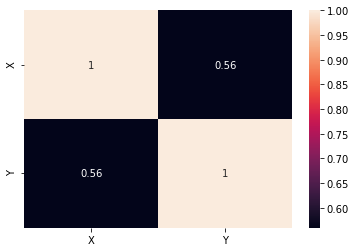

In [145]:
sns.heatmap(data_num_scale.corr(),annot=True)
plt.show()

In [146]:
data_dummy  = pd.get_dummies(data.loc[:,["Descript", "PdDistrict", "Resolution"]], drop_first=True).reset_index(drop=True)

data_dummy.head()

,Descript_ANIMALS,Descript_ARREST,Descript_ASSAULT TO ROB BANK WITH A GUN,Descript_ATTEMPTED EXTORTION,"Descript_ATTEMPTED KIDNAPPING, ADULT VICTIM","Descript_ATTEMPTED KIDNAPPING, JUVENILE VICTIM",Descript_BATTERY,Descript_BRIBERY OF EXECUTIVE OFFICER,Descript_BRIBERY OF WITNESSES,Descript_BURGLARY,...,Resolution_JUVENILE BOOKED,Resolution_JUVENILE CITED,Resolution_JUVENILE DIVERTED,Resolution_LOCATED,Resolution_NONE,Resolution_NOT PROSECUTED,Resolution_PROSECUTED BY OUTSIDE AGENCY,Resolution_PROSECUTED FOR LESSER OFFENSE,Resolution_PSYCHOPATHIC CASE,Resolution_UNFOUNDED
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [147]:
data_label = data.iloc[:,6:]

data_label.head(2)

,Year,Quarter,Month,Day_of_month,Day_of_week,Hours,State
0,2015,2,5,13,2,19,20
1,2015,2,5,13,2,19,20


In [148]:
x = pd.concat([data_num_scale, data_dummy, data_label], axis= 1)

y =  data["Category"]

In [149]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=.3, 
                                                    stratify= y, 
                                                    random_state=10)

### Base Model

In [150]:
model = LogisticRegression()

train = model.fit(X_train, y_train)

pred = model.predict(X_test)
model.score(X_test, y_test)

0.25498927547785816

### Decision Tree

In [151]:
tree = DecisionTreeClassifier()


tree.fit(X_train, y_train)
tree.predict(X_test)

tree.score(X_test, y_test) # accuracy on test dataset

0.9080538314067156

In [152]:
tree.score(X_train, y_train) # accuracy on train dataset

0.9978995629919595

##### Important features

In [153]:

tree = DecisionTreeClassifier()

# use fit() to fit the model on the train set
tuned_model = tree.fit(X_train, y_train)

# create a dataframe that stores the feature names and their importance
important_features = pd.DataFrame({'Features': X_train.columns, 
                                   'Importance': tuned_model.feature_importances_})

# sort the dataframe in the descending order according to the feature importance
important_features = important_features.sort_values('Importance', ascending = False)

In [154]:
important_features.head(20).index

Int64Index([34, 54, 102, 11, 69, 57, 15, 63, 64, 8, 1, 0, 62, 25, 48, 61, 3,
            60, 33, 47],
           dtype='int64')

In [155]:
important_feat  =important_features.head(20).index

In [156]:
Xtrain = X_train.iloc[:,[34, 54, 102, 11, 69, 57, 15, 63, 64, 8, 1, 0, 62, 25, 48, 61, 3,
            60, 33, 47]]

Xtest = X_test.iloc[:,[34, 54, 102, 11, 69, 57, 15, 63, 64, 8, 1, 0, 62, 25, 48, 61, 3,
            60, 33, 47]]

In [157]:
tree = DecisionTreeClassifier()


tree.fit(Xtrain, y_train)
tree.predict(Xtest)

tree.score(Xtest, y_test) # accuracy on test dataset

0.7854943719985574

In [158]:
tree.score(Xtrain, y_train) # accuracy on train dataset

0.8572727834776469

### RandomForest

In [159]:
rf  = RandomForestClassifier()

rf.fit(X_train, y_train)
pred = rf.predict(X_test)

rf.score(X_test, y_test) # accuracy on test dataset

0.9299394491581725

In [160]:
rf.score(X_train, y_train) # accuracy on train dataset

0.9978995629919595

##### important features:

In [161]:
 # instantiate the 'RandomForestClassifier' 
# pass the 'random_state' to obtain the same samples for each time you run the code
random_forest_tuned_model = RandomForestClassifier(criterion = 'entropy', random_state = 10)

# use fit() to fit the model on the train set
random_forest_tuned_model = random_forest_tuned_model.fit(X_train, y_train)

# create a dataframe that stores the feature names and their importance
important_features = pd.DataFrame({'Features': X_train.columns, 
                                   'Importance': random_forest_tuned_model.feature_importances_})

# sort the dataframe in the descending order according to the feature importance
important_features = important_features.sort_values('Importance', ascending = False)

In [162]:
important_features.head(30).index

Int64Index([102,  34,  63,  54,  11,  90,  69,  57,  64,  15,  61,   8,   3,
             60,  25,  62,   1,  51,  48,   0,  43,  47,  80,  96,  89,  49,
            101,  50,  36,  19],
           dtype='int64')

In [163]:
Xtrain = X_train.iloc[:,[102,  34,  63,  54,  11,  90,  69,  57,  64,  15,  61,   8,   3,
             60,  25,  62,   1,  51,  48,   0,  43,  47,  80,  96,  89]]

Xtest = X_test.iloc[:,[102,  34,  63,  54,  11,  90,  69,  57,  64,  15,  61,   8,   3,
             60,  25,  62,   1,  51,  48,   0,  43,  47,  80,  96,  89]]

In [164]:
 random_forest = RandomForestClassifier(random_state = 10)

random_forest.fit(Xtrain, y_train)

pred = random_forest.predict(Xtest)

In [165]:
random_forest.score(Xtest, y_test) # accuracy on test dataset

0.8042594385285576

In [166]:
random_forest.score(Xtrain, y_train) # accuracy on train dataset

0.946691852386949

### Tune Parameters

##### For RandomFroest

In [167]:
# tuned_paramaters = [{'criterion': ['entropy', 'gini'],
#                      'n_estimators': [90, 100, 150, 200, 300, 500],
#                      'max_depth': [10, 15, 20, 40, 80],
#                      'min_samples_split': [2, 5, 50, 100, 150]}]
  
# random_forest_classification = RandomForestClassifier(random_state = 10)

# rf_grid = GridSearchCV(estimator = random_forest_classification, 
#                        param_grid = tuned_paramaters, 
#                        cv = 3)


# rf_model = rf_grid.fit(X_train, y_train)

# print('Best parameters for random forest Classifier: ', rf_model.best_params_, '\n')

##### For Decision Tree

In [168]:
# # create a dictionary with hyperparameters and its values
# # pass the criteria 'entropy' and 'gini' to the parameter, 'criterion' 
# # pass the range of values to 'max_depth' that assigns maximum depth of the tree
# # pass the range of values to 'min_samples_split' that assigns minimum number of samples to split an internal node


# tuned_paramaters = [{'criterion': ['entropy', 'gini'],
#                      'max_depth': range(2, 500, 5),
#                      'min_samples_split': range(2,25, 2)}]
 
# # instantiate the 'DecisionTreeClassifier' 
# # pass the 'random_state' to obtain the same samples for each time you run the code


# decision_tree_model = DecisionTreeClassifier(random_state = 10)

# # use GridSearchCV() to find the optimal value of the hyperparameters
# # estimator: pass the decision tree classifier model
# # param_grid: pass the list 'tuned_parameters'
# # cv: number of folds in k-fold i.e. here cv = 5


# tree_grid = GridSearchCV(estimator = decision_tree_model, 
#                          param_grid = tuned_paramaters, 
#                          cv = 5)

# # fit the model on X_train and y_train using fit()

# tree_grid.fit(X_train, y_train)

# # get the best parameters

# print('Best parameters for Decision Tree Classifier: ', tree_grid.best_params_, '\n')

###  Best feature after parameter tuning..

In [169]:
# #  Best feature after parameter tuning..

# important_columns = list(important_features['Features'].iloc[:10])

# random_forest_tuned_model = RandomForestClassifier(criterion = rf_model.best_params_['criterion'], 
#                                                    max_depth = rf_model.best_params_['max_depth'], 
#                                                    min_samples_split = rf_model.best_params_['min_samples_split'], 
#                                                    n_estimators = rf_model.best_params_['n_estimators'],
#                                                    random_state = 10)
 
# random_forest_tuned_model = random_forest_tuned_model.fit(X_train[important_columns], y_train)
 
# y_pred = random_forest_tuned_model.predict(X_test[important_columns])